This notebook converts the Ifremer dataset into subfiles matching the campaigns.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import h5netcdf
# from matplotlib import cm
# import matplotlib.dates as mdates
# import cartopy.crs as ccrs

All the cruises:

Metz =  77; Epic = 69; WHOTS = 87; STRATUS = 83; NEAQS = 78; HiWInGS = 72; GasEx = 71
DYNAMO = 68; Calwater = 67; Capricorn = 73

These are manually put into a list of dictionary and used by `script/compute_wave.py` to interpolate for wave info along ship trajectory. 

In [11]:
metz = {'name':'metz', 'pcode':77, 'months':['199301','199302','199303','199304','199305','199306','199307','199308','199309',
        '199612','199801','199905','199906','199907','199908','199909','199910','199911','199912']} # checked
calwater = {'name':'calwater', 'pcode':67, 'months':['201501','201502']}
hiwings = {'name':'hiwings', 'pcode':72, 'months':['201309','201310','201311']}
capricorn = {'name':'capricorn', 'pcode':73, 'months':['201603','201604']}
dynamo = {'name':'dynamo', 'pcode':68, 'months':['201109','201110','201111','201112']}
stratus = {'name':'stratus', 'pcode':83, 'months':['200110','200412','200510','200610','200710','200711',
                                                  '200810','200811','200812','201001']}
epic = {'name':'epic', 'pcode':69, 'months':['199911','199912',
        '200004','200005','200006','200007','200008','200009','200010','200011',
        '200103','200104','200105','200106','200107','200108','200109','200110','200111','200112',
        '200203','200204','200205','200206','200207','200208','200209','200210','200211',
        '200311','200410','200411']}
whots = {'name':'whots', 'pcode':87, 'months':['200907','201107','201206','201307','201407','201507']} #checked
neaqs = {'name':'neaqs', 'pcode':78, 'months':['200407','200408']} #checked
gasex = {'name':'gasex', 'pcode':71, 'months':['200803','200804']} #checked
cruises = [metz, calwater,hiwings,capricorn,dynamo,stratus,epic,whots,neaqs,gasex]


In [ ]:
ds = xr.load_dataset('../data/Processed/psd.nc')

Metz(77): 1991-11-22 to 1999-12-30 but quite sporadic

In [33]:
ds_metz = ds.where(ds.pcode==77, drop=True)
time_masked = ds_metz.time.where(ds_metz.time.dt.year >= 1993, drop=True)
time_masked

# months=['199301','199302','199303','199304','199305','199306','199307','199308','199309',
#         '199612','199801',
#         '199905','199906','199907','199908','199909','199910','199911','199912',]

<xarray.DataArray 'time' (time: 5457)>
array(['1993-01-01T00:09:00.000000000', '1993-01-01T01:00:00.288000000',
       '1993-01-01T01:50:59.712000000', ...,
       '1999-12-02T16:59:59.712000000', '1999-12-02T18:00:00.000000000',
       '1999-12-02T19:00:00.288000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01T00:09:00 ... 1999-12-02T19:00:0...

Calwater(67): 2015-01-16 to 2015-02-10

In [2]:
ds_cw = ds.where(ds.pcode==67, drop=True)
time_masked = ds_cw.time
print(time_masked)

<xarray.DataArray 'time' (time: 624)>
array(['2015-01-16T00:24:59.990400000', '2015-01-16T01:30:00.000000000',
       '2015-01-16T02:30:00.028800000', ..., '2015-02-10T21:24:59.990400000',
       '2015-02-10T22:30:00.000000000', '2015-02-10T23:30:00.028800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T00:24:59.990400 ... 2015-02-10T...


In [3]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2015
# Jan
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g01.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Feb
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g02.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2015-01-15T00:00:00.000000000', '2015-02-11T00:00:00.000000000'))


In [4]:
# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2015_Calwater.nc',engine='h5netcdf')

HiWInGS(72): 2013-09-14 to 2013-11-12

In [54]:
ds = xr.load_dataset('../../data/PSD/fluxes_all_cruises_compilation.nc')
ds_hw = ds.where(ds.pcode==72, drop=True)
time_masked = ds_hw.time
print(time_masked)

<xarray.DataArray 'time' (time: 1296)>
array(['2013-09-14T00:24:59.904000000', '2013-09-14T01:30:00.000000000',
       '2013-09-14T02:30:00.115200000', ..., '2013-11-12T21:24:59.904000000',
       '2013-11-12T22:30:00.000000000', '2013-11-12T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-09-14T00:24:59.904000 ... 2013-11-12T...


In [43]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2013
# Sep
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g09.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Oct
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g10.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
# Nov
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g11.nc' %YR
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2013-09-13', '2013-11-13'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2013_HiWInGS.nc')


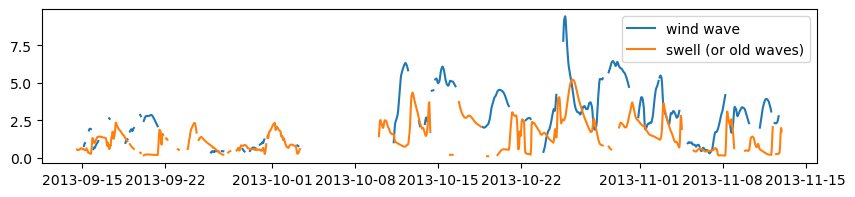

In [55]:
# Interpolation for wave-related info
plt.figure(figsize=[10,2])

pdir0_ERA5 = ds_ERA5_short.pdir0.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)
plp0_ERA5 = ds_ERA5_short.plp0.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)  
phs0_ERA5 = ds_ERA5_short.phs0.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)  
pdir1_ERA5 = ds_ERA5_short.pdir1.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)
plp1_ERA5 = ds_ERA5_short.plp1.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat) 
phs1_ERA5 = ds_ERA5_short.phs1.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)

plt.plot(time_masked,phs0_ERA5,label='wind wave')
plt.plot(time_masked,phs1_ERA5,label='swell (or old waves)')
plt.legend()

Text(0, 0.5, '$u_*$ (m/s)')

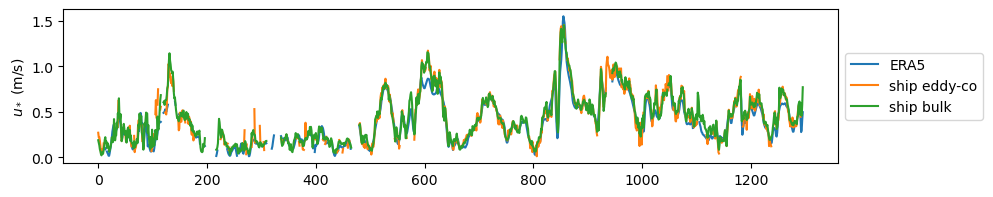

In [52]:
# Interpolation for wind stress
plt.figure(figsize=[10,2])

ustar_ERA5 = ds_ERA5_short.uust.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)
vstar_ERA5 = ds_ERA5_short.vust.interp(time=ds_hw.time,longitude=ds_hw.lon,latitude=ds_hw.lat)

Ustar_ERA5 = (np.array(ustar_ERA5)**2 + np.array(vstar_ERA5)**2)**0.5  
plt.plot(Ustar_ERA5, label='ERA5')
plt.plot(ds_hw.taucx[:]**0.5, label='ship eddy-co')
plt.plot(ds_hw.taub[:]**0.5, label='ship bulk')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$u_*$ (m/s)')

Capricorn(73): 2016-03-14 to 2016-04-13

In [49]:
ds_73 = ds.where(ds.pcode==73, drop=True)
time_masked = ds_73.time

In [23]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2016
# Mar
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g03.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Apr
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g04.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2016-03-13T00:00:00.000000000', '2016-04-13T00:00:00.000000000'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2016_Capricorn.nc',engine='h5netcdf')


DYNAMO(68): 2011-09-03 to 2011-12-31

In [76]:
ds_68 = ds.where(ds.pcode==68, drop=True)
time_masked = ds_68.time
print(time_masked)

<xarray.DataArray 'time' (time: 2221)>
array(['2011-09-03T00:24:59.904000000', '2011-09-03T01:30:00.000000000',
       '2011-09-03T02:30:00.115200000', ..., '2011-12-31T21:24:59.904000000',
       '2011-12-31T22:30:00.000000000', '2011-12-31T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-09-03T00:24:59.904000 ... 2011-12-31T...


In [69]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2011
# Sep
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g09.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Oct
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g10.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
# Nov
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g11.nc' %YR
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})
# Dec
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g12.nc' %YR
ds4 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3,ds4], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2011-09-02', '2011-12-31'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2011_DYNAMO.nc',engine='h5netcdf')

STRATUS(83): 2001-10-10 to 2010-01-28 intermittent

In [7]:
ds_83 = ds.where(ds.pcode==83, drop=True)
time_masked = ds_83.time
print(time_masked)
# 2001-10,2004-12,2005-10,2006-10,2007-10,2007-11,2008-10,2008-11,2008-12,2010-01

<xarray.DataArray 'time' (time: 3083)>
array(['2001-10-10T00:24:59.904000000', '2001-10-10T01:30:00.000000000',
       '2001-10-10T02:30:00.288000000', ..., '2010-01-28T21:24:59.904000000',
       '2010-01-28T22:30:00.000000000', '2010-01-28T23:30:00.288000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-10-10T00:24:59.904000 ... 2010-01-28T...


In [5]:
basepath = '/Users/jwu/Work/Dabble/Waves/'

file = basepath + 'data/LOPS_WW3-GLOB-30M_200110.nc' 
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200412.nc' 
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200510.nc'
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200610.nc'
ds4 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200710.nc'
ds5 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200711.nc'
ds6 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200810.nc'
ds7 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200811.nc'
ds8 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200812.nc'
ds9 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_201001.nc'
ds10 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2001-10-10', '2010-01-28'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
# ds_ERA5_short.to_netcdf('../../data/ERA5/2011_DYNAMO.nc',engine='h5netcdf')

In [12]:
uust = ds_ERA5_short.uust.interp(time=ds_83.time,longitude=ds_83.lon,latitude=ds_83.lat)
vust = ds_ERA5_short.vust.interp(time=ds_83.time,longitude=ds_83.lon,latitude=ds_83.lat)
ust = (uust**2+vust**2)**0.5

(-50.0, 10.0)

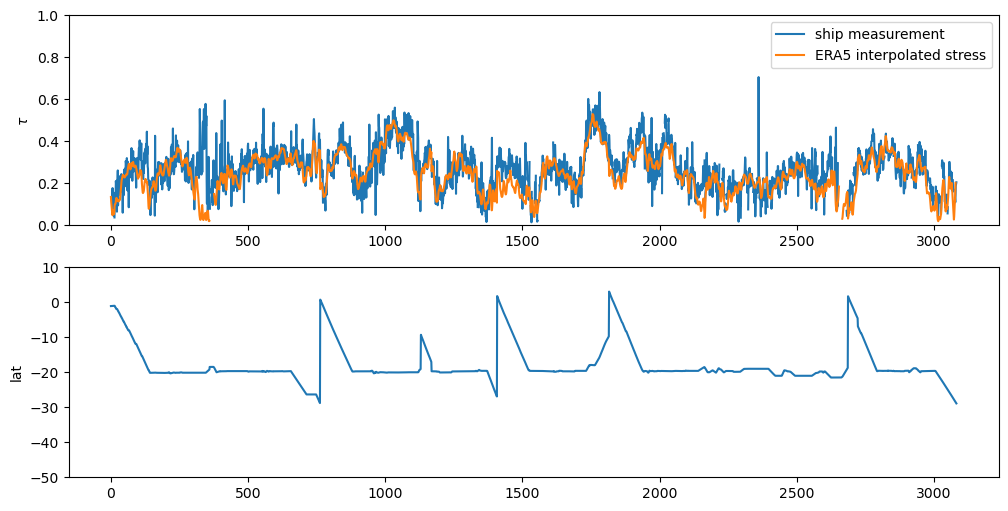

In [17]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12, 6))
ax1.plot(ds_83.taucx**0.5, label='ship measurement')
ax1.plot(ust, label='ERA5 interpolated stress')
ax1.set_ylabel(r'$\tau$')
ax1.set_ylim([0,1])
ax1.legend()
ax2.plot(ds_83.lat)
ax2.set_ylabel('lat')
ax2.set_ylim([-50,10])

Epic(69): 1999-11-02 to 2004-11-27 intermittent

In [2]:
ds_69 = ds.where(ds.pcode==69, drop=True)
time_masked = ds_69.time
print(time_masked)

<xarray.DataArray 'time' (time: 6882)>
array(['1999-11-02T03:24:59.040000000', '1999-11-02T04:30:00.000000000',
       '1999-11-02T05:30:01.152000000', ..., '2004-11-27T21:24:59.904000000',
       '2004-11-27T22:30:00.000000000', '2004-11-27T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-11-02T03:24:59.040000 ... 2004-11-27T...


In [44]:
basepath = '/Users/jwu/Work/Dabble/Waves/'

months=['199911','199912',
        '200004','200005','200006','200007','200008','200009','200010','200011',
        '200103','200104','200105','200106','200107','200108','200109','200110','200111','200112',
        '200203','200204','200205','200206','200207','200208','200209','200210','200211',
        '200311','200410','200411']

month = months[0]
file = basepath + 'data/LOPS_WW3-GLOB-30M_' + month +'.nc' 
ds_ERA5 = xr.open_dataset(file,chunks={'time':'500MB'})
for month in months[1:]:
    file = basepath + 'data/LOPS_WW3-GLOB-30M_' + month +'.nc' 
    dsmonth = xr.open_dataset(file,chunks={'time':'500MB'})
    ds_ERA5 = xr.concat([ds_ERA5,dsmonth],dim='time')

(-50.0, 10.0)

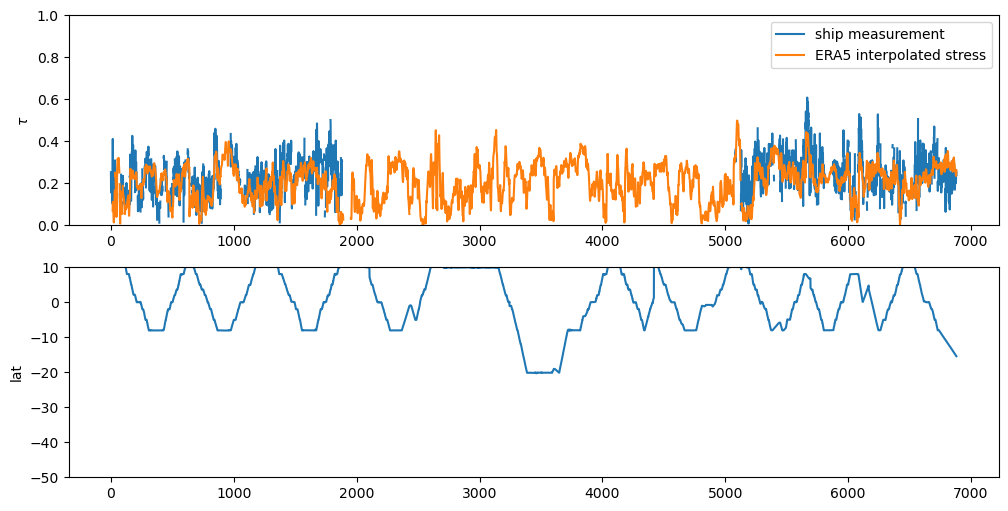

In [46]:
uust = ds_ERA5.uust.interp(time=ds_69.time,longitude=ds_69.lon,latitude=ds_69.lat)
vust = ds_ERA5.vust.interp(time=ds_69.time,longitude=ds_69.lon,latitude=ds_69.lat)
ust = (uust**2+vust**2)**0.5
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12, 6))
ax1.plot(ds_69.taucx**0.5, label='ship measurement')
ax1.plot(ust, label='ERA5 interpolated stress')
ax1.set_ylabel(r'$\tau$')
ax1.set_ylim([0,1])
ax1.legend()
ax2.plot(ds_69.lat)
ax2.set_ylabel('lat')
ax2.set_ylim([-50,10])

WHOTS(87): 2009-07-10 to 2015-07-16 intermittent

In [33]:
ds_87 = ds.where(ds.pcode==87, drop=True)
time_masked = ds_87.time
print(time_masked)
# ds_87.time.sel(time="2004")

<xarray.DataArray 'time' (time: 1104)>
array(['2009-07-10T00:24:59.904000000', '2009-07-10T01:30:00.000000000',
       '2009-07-10T02:30:00.115200000', ..., '2015-07-16T21:24:59.904000000',
       '2015-07-16T22:30:00.000000000', '2015-07-16T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2009-07-10T00:24:59.904000 ... 2015-07-16T...


In [ ]:
months=['200907','201107','201206','201307','201407','201507']

NEAQS(78): 2005-07-07 to 2004-08-12

In [34]:
ds_78 = ds.where(ds.pcode==78, drop=True)
time_masked = ds_78.time
print(time_masked)

<xarray.DataArray 'time' (time: 779)>
array(['2004-07-07T00:24:59.904000000', '2004-07-07T01:30:00.000000000',
       '2004-07-07T02:30:00.115200000', ..., '2004-08-12T11:30:00.115200000',
       '2004-08-12T12:24:59.904000000', '2004-08-12T13:25:00.019200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2004-07-07T00:24:59.904000 ... 2004-08-12T...


GasEx(71): 2008-03-01 to 2008-04-07

In [35]:
ds_71 = ds.where(ds.pcode==71, drop=True)
time_masked = ds_71.time
print(time_masked)

<xarray.DataArray 'time' (time: 912)>
array(['2008-03-01T00:24:59.990400000', '2008-03-01T01:30:00.000000000',
       '2008-03-01T02:30:00.028800000', ..., '2008-04-07T21:24:59.990400000',
       '2008-04-07T22:30:00.000000000', '2008-04-07T23:30:00.028800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-03-01T00:24:59.990400 ... 2008-04-07T...
